#  Deconvolution_Wide_Boost
Example to illustrate deconvolution function (class TSpectrum).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:35 AM.</small></i>

In [1]:
Int_t i;
const Int_t nbins = 256;
Double_t xmin     = 0;
Double_t xmax     = nbins;
Double_t source[nbins];
Double_t response[nbins];
gROOT->ForceStyle();

TH1F *h = new TH1F("h","Deconvolution",nbins,xmin,xmax);
TH1F *d = new TH1F("d","",nbins,xmin,xmax);

TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum.root";
TFile *f     = new TFile(file.Data());
h = (TH1F*) f->Get("decon3");
h->SetTitle("Deconvolution of closely positioned overlapping peaks using boosted Gold deconvolution method");
d = (TH1F*) f->Get("decon_response_wide");

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);
for (i = 0; i < nbins; i++) response[i]=d->GetBinContent(i + 1);

h->SetMaximum(200000);
h->Draw("L");
TSpectrum *s = new TSpectrum();
s->Deconvolution(source,response,256,200,50,1.2);

for (i = 0; i < nbins; i++) d->SetBinContent(i + 1,source[i]);
d->SetLineColor(kRed);
d->Draw("SAME L");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

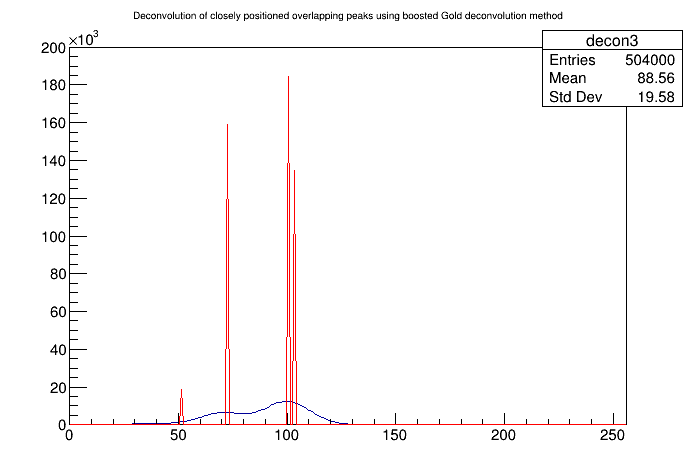

In [2]:
gROOT->GetListOfCanvases()->Draw()